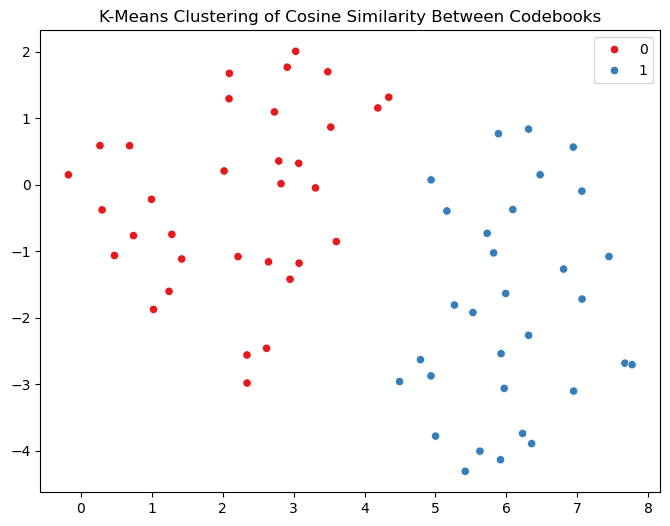

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

codebook_1 = np.load('../results/original/original.npy')  
codebook_2 = np.load('../results/gaussian/gaussian.npy') 
cosine_sim = cosine_similarity(codebook_1, codebook_2)

kmeans = KMeans(n_clusters=2, random_state=22) 
clusters = kmeans.fit_predict(cosine_sim)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
cosine_tsne = tsne.fit_transform(cosine_sim)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=cosine_tsne[:, 0], y=cosine_tsne[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering of Cosine Similarity Between Codebooks')
plt.show()


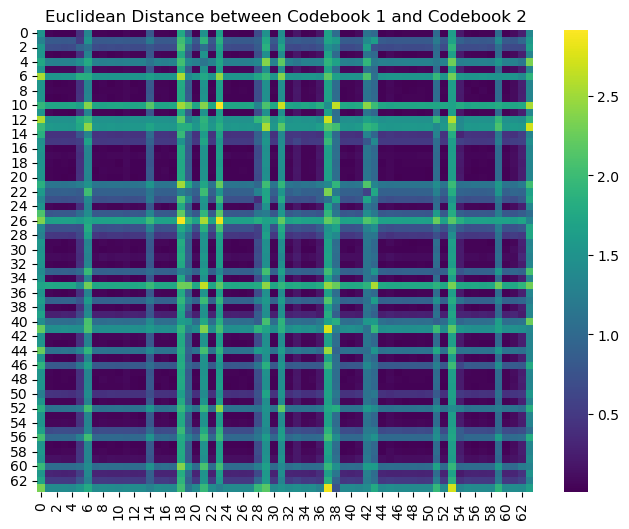

In [5]:
from scipy.spatial.distance import cdist

euclidean_distances = cdist(codebook_1, codebook_2, metric='euclidean')
plt.figure(figsize=(8, 6))
sns.heatmap(euclidean_distances, cmap="viridis", annot=False)
plt.title('Euclidean Distance between Codebook 1 and Codebook 2')
plt.show()
